# Disaster Analysis (Titanic Dataset)

In this project, we'll try to make predictions about the people who survived when the titanic ship sank. This study will be based on various factors which affected the survival. For Example, Women and kids were on topmost priority to be saved. So the gender and age play very important roles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Now we'll import the datbase which we have in CSV format for this project.

In [3]:
eda = pd.read_excel('Titanic.xlsx')

It is really important to study the various fields we have and categorize data according to the type. It is also important to know that what fields will be really essential in finding whether the person survived or not. Let's see all the columns and some rows as well of the dataset.

In [4]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley\n(Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.\n3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath\n(Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we have the various columns. Intially we find that factors like sex, age, cabin, fare and embarked(Where the person boards the ship) will havve influence on the survived. Now let's find some more things about this data like data types, mean, mediam, Standard Deviation etc.

In [5]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
eda.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Now we'll try to study about each column in depth trying to understand more about it and also finding various patterns and relation betwwn different kind of data.

## Univariate Analysis

We'll start with univariate analysis and use bar charts, box plots and distance plots according too the type of the data.

### QUALITATIVE DATA

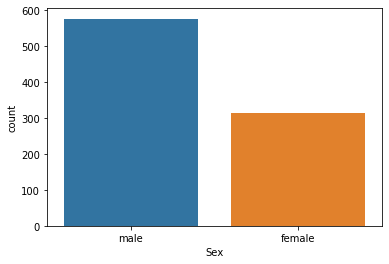

In [7]:
sns.countplot(x='Sex',data=eda)

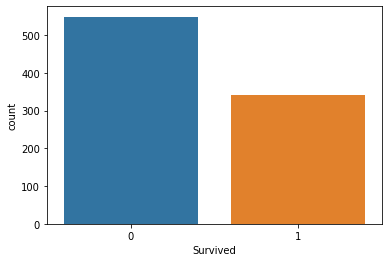

In [8]:
sns.countplot(x='Survived',data=eda)

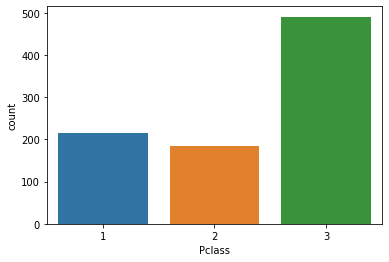

In [9]:
sns.countplot(x='Pclass',data=eda)

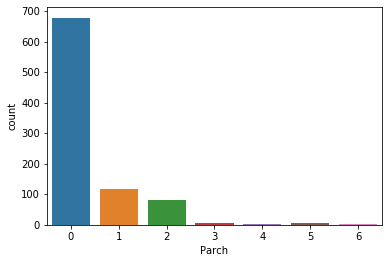

In [10]:
sns.countplot(x='Parch',data=eda)

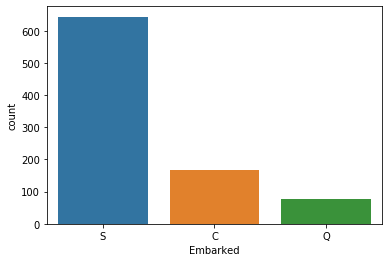

In [11]:
sns.countplot(x='Embarked',data=eda)

### QUANTITATIVE DATA

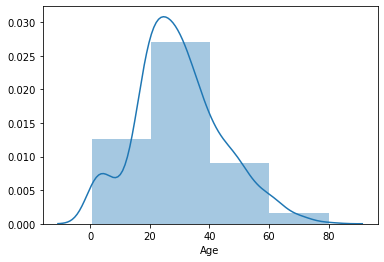

In [12]:
sns.distplot(eda['Age'],bins=4)

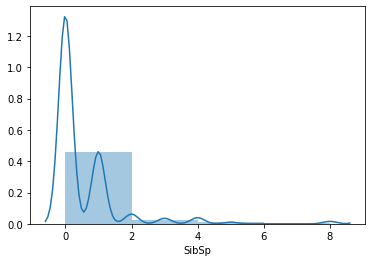

In [13]:
sns.distplot(eda['SibSp'],bins=4)

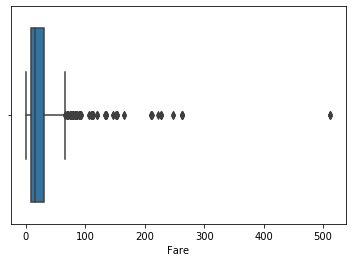

In [14]:
sns.boxplot(x='Fare',data=eda)

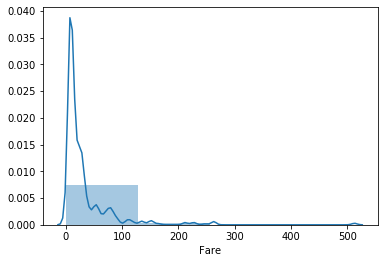

In [15]:
sns.distplot(eda['Fare'],bins=4)

## Bivariate Analysis

We'll try to find relations between two different fields like do they have a linear realtion or something else. This will aslo help us find what factors influence survival rate in which way.

### Quantitative Data

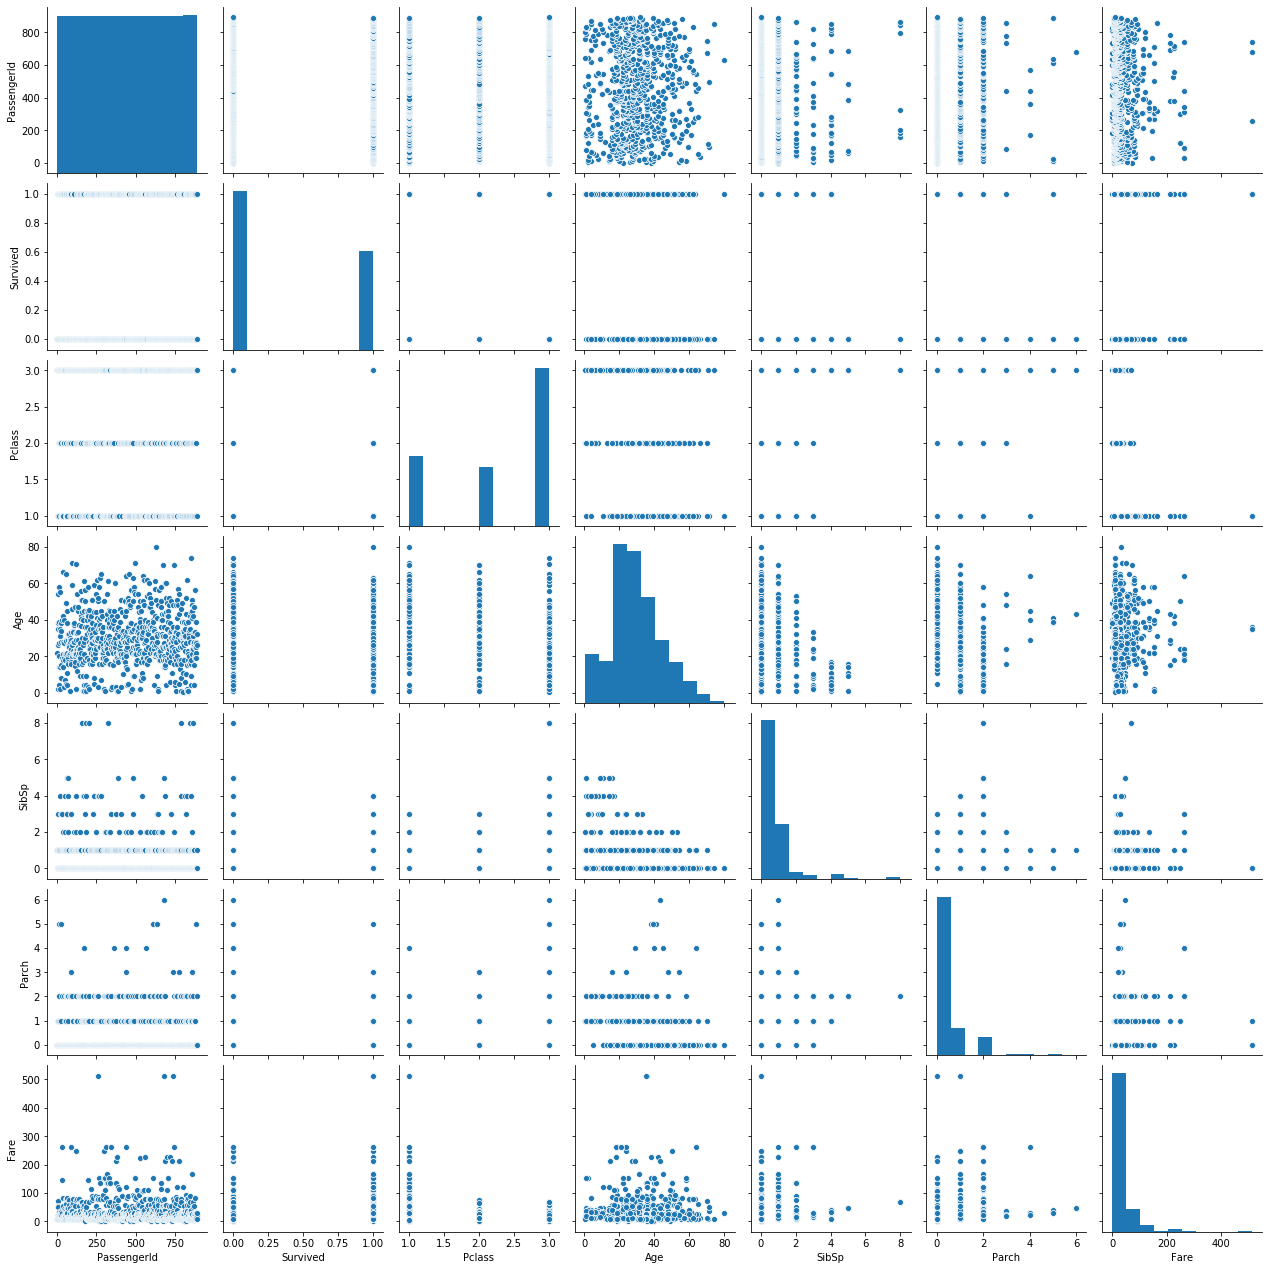

In [16]:
sns.pairplot(eda)

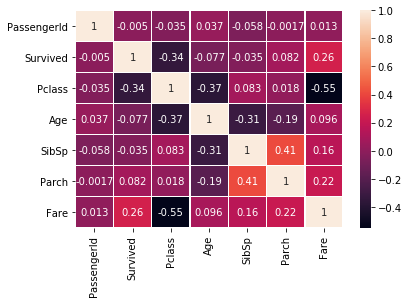

In [17]:
sns.heatmap(eda.corr(), annot=True, linewidth=0.5)

### Qualitative Data

In [18]:
counts = eda.groupby(['Survived', 'Pclass'], axis= 0)
counts.size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [19]:
counts = eda.groupby(['Survived', 'Sex'], axis= 0)
counts.size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [20]:
counts = eda.groupby(['Survived', 'Embarked'], axis= 0)
counts.size()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64

## Filling empty columns 

In [21]:
eda.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
cabin_only = eda[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x) 

In [24]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
cabin_only[cabin_only["Cabin_Data"]]
cabin_only

,Cabin,Cabin_Data,Deck,Room
0,NaN,False,NaN,NaN
1,C85,True,C,85.0
2,NaN,False,NaN,NaN
3,C123,True,C,123.0
4,NaN,False,NaN,NaN
...,...,...,...,...
886,NaN,False,NaN,NaN
887,B42,True,B,42.0
888,NaN,False,NaN,NaN
889,C148,True,C,148.0


In [25]:
cabin_only.drop(["Cabin", "Cabin_Data"], axis=1, inplace=True, errors="ignore")
cabin_only["Deck"] = cabin_only["Deck"].fillna("N") # assign 'N' for the deck name of the null Cabin value. 
cabin_only["Room"] = cabin_only["Room"].fillna(cabin_only["Room"].mean()) # use mean to fill null Room values.

In [26]:
cabin_only

,Deck,Room
0,N,50.49
1,C,85.00
2,N,50.49
3,C,123.00
4,N,50.49
...,...,...
886,N,50.49
887,B,42.00
888,N,50.49
889,C,148.00


In [27]:
cabin_only=cabin_only.join(pd.get_dummies(cabin_only['Deck'], prefix='Deck'))
cabin_only=cabin_only.drop(['Deck'], axis=1)
cabin_only

,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,50.49,0,0,0,0,0,0,0,1,0
1,85.00,0,0,1,0,0,0,0,0,0
2,50.49,0,0,0,0,0,0,0,1,0
3,123.00,0,0,1,0,0,0,0,0,0
4,50.49,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,50.49,0,0,0,0,0,0,0,1,0
887,42.00,0,1,0,0,0,0,0,0,0
888,50.49,0,0,0,0,0,0,0,1,0
889,148.00,0,0,1,0,0,0,0,0,0


In [28]:
eda=pd.concat([eda,cabin_only],axis=1)
eda.shape

(891, 22)

In [29]:
cabin_only_test = eda[["Cabin"]].copy()
cabin_only_test["Cabin_Data"] = cabin_only_test["Cabin"].isnull().apply(lambda x: not x) # extract rows that do not contain null Cabin data.
cabin_only_test["Deck"] = cabin_only_test["Cabin"].str.slice(0,1)
cabin_only_test["Room"] = cabin_only_test["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
cabin_only_test[cabin_only_test["Cabin_Data"]]
cabin_only_test.drop(["Cabin", "Cabin_Data"], axis=1, inplace=True, errors="ignore")
cabin_only_test["Deck"] = cabin_only_test["Deck"].fillna("N") # assign 'N' for the deck name of the null Cabin value. 
cabin_only_test["Room"] = cabin_only_test["Room"].fillna(cabin_only_test["Room"].mean()) # use mean to fill null Room values.
cabin_only_test=cabin_only_test.join(pd.get_dummies(cabin_only_test['Deck'], prefix='Deck'))
cabin_only_test=cabin_only_test.drop(['Deck'], axis=1)
eda=pd.concat([eda,cabin_only_test],axis=1)

In [30]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,50.49,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley\n(Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,...,85.00,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.\n3101282,7.9250,...,50.49,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath\n(Lily May Peel)",female,35.0,1,0,113803,53.1000,...,123.00,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,50.49,0,0,0,0,0,0,0,1,0


## Fixing outliers

In [32]:
eda['Fare'].describe() 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

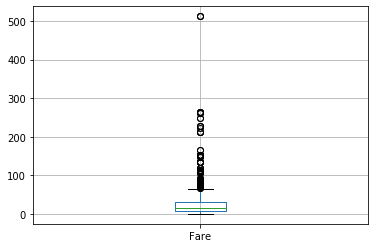

In [31]:
eda.boxplot(column = ['Fare'])

As we can clearly see fare has many upper outliers so we will filx them.

In [33]:
IQR = eda['Fare'].quantile(0.75)-eda['Fare'].quantile(0.25)
print(IQR)

23.0896


In [34]:
Upper_OutlierLimit = eda['Fare'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = eda['Fare'].quantile(0.25) - 1.5*IQR
print(Upper_OutlierLimit)
print(Lower_OutlierLimit)

65.6344
-26.724


In [35]:
OutlierValues = eda[(eda['Fare']>=Upper_OutlierLimit)|(eda['Fare']<=Lower_OutlierLimit)]
OutlierValues

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
1,2,1,1,"Cumings, Mrs. John Bradley\n(Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,...,85.00,0,0,1,0,0,0,0,0,0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,23.00,0,0,1,0,0,0,0,0,0
31,32,1,1,"Spencer, Mrs. William Augustus\n(Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,...,78.00,0,1,0,0,0,0,0,0,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,...,50.49,0,0,0,0,0,0,0,1,0
52,53,1,1,"Harper, Mrs. Henry Sleeper\n(Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,...,33.00,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,...,50.49,0,0,0,0,0,0,0,1,0
849,850,1,1,"Goldenberg, Mrs. Samuel L\n(Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,...,92.00,0,0,1,0,0,0,0,0,0
856,857,1,1,"Wick, Mrs. George Dennick\n(Mary Hitchcock)",female,45.0,1,1,36928,164.8667,...,50.49,0,0,0,0,0,0,0,1,0
863,864,0,3,"Sage, Miss. Dorothy Edith\n""Dolly""",female,NaN,8,2,CA. 2343,69.5500,...,50.49,0,0,0,0,0,0,0,1,0


In [36]:
print(eda['Fare'].quantile(0.90))

77.9583


In [37]:
eda["Fare"]=np.where(eda["Fare"] >31, 31,eda['Fare'])

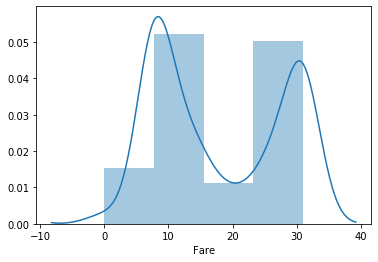

In [38]:
sns.distplot(eda['Fare'],bins=4)

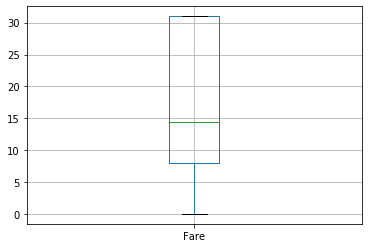

In [39]:
eda.boxplot(column = ['Fare'])

## Creating the model


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [72]:
train=eda
test=pd.read_excel('Titanic.xlsx')
submission=eda

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,...,50.49,0,0,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley\n(Florence Briggs T...",female,38.0,1,0,PC 17599,31.000,...,85.00,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.\n3101282,7.925,...,50.49,0,0,0,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath\n(Lily May Peel)",female,35.0,1,0,113803,31.000,...,123.00,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,...,50.49,0,0,0,0,0,0,0,1,0


In [60]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Now we are making the categorical variables to digit 

In [ ]:
train['Sex'] = train['Sex'].apply(lambda x : 1 if x=='male' else 0)
test['Sex'] = test['Sex'].apply(lambda x : 1 if x=='male' else 0)

In [63]:
train['Embarked'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})
test['Embarked'] = test['Embarked'].map({'S':1, 'C':2, 'Q':3})

## Obtain target and predictors

In [64]:
my_imputer = SimpleImputer()

features = ['Pclass','Sex','Age','Parch', 'Fare', 'Embarked']

imputed_train = pd.DataFrame(my_imputer.fit_transform(train[features]))
imputed_test = pd.DataFrame(my_imputer.fit_transform(test[features]))

y = train.Survived

X = imputed_train.copy()
X_test = imputed_test.copy()

## Break of validation set into training data

In [65]:
train_X, val_X, train_y, val_y = train_test_split(imputed_train, y, train_size=0.8, test_size=0.2, random_state=0)

## Evaluate several models

In [66]:
model_1 = RandomForestRegressor(n_estimators = 50, random_state = 0)
model_2 = RandomForestRegressor(n_estimators = 100,criterion = 'mae', random_state = 0)
model_3 = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, random_state = 0)
model_4 = RandomForestRegressor(n_estimators = 200, min_samples_split = 20, random_state = 0)
model_5 = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state = 0)

## To select the model out of five, we define a function score_model()

1. This function returns the mean absolute error (MAE) from the validation set
2. The best model will obtain the lowest MAE

In [67]:
def score_model(model, X_train = train_X, X_val = val_X, y_train = train_y, y_val = val_y):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    return(mean_absolute_error(y_val, predictions))

models = [model_1,model_2,model_3,model_4,model_5]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("model %d MAE : %d"%(i+1, mae))

model 1 MAE : 0
model 2 MAE : 0
model 3 MAE : 0
model 4 MAE : 0
model 5 MAE : 0


In [68]:
best_model = model_2

## Generate test Predictions¶

In [70]:
my_model = best_model

In [73]:
my_model.fit(imputed_train, y)

predict = my_model.predict(imputed_test)

submission['Survived'] = predict

## Output generator


In [79]:
submission.to_csv('submission.csv', index = False)